<h1>Tidy Tuesdays 1: Novel Corona Virus 2019 Dataset</h1>
notebook by: Franchezka Cruz

In [204]:
import  pandas as pd
import  numpy as np

# Data visualization
import  seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline

<h2>Data preparation</h2>

Let's take a look at the data:

In [205]:
data = pd.read_csv('covid_19_data.csv')

data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


Here is the count of missing values for each column in the dataset: 

In [206]:
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     62045
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

Since only the Province/State column has empty data, let's just ignore this column by deleting it.

In [207]:
data= data.drop(['Province/State'], axis=1)

In [208]:
data.isnull().sum()

SNo                0
ObservationDate    0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

<br>Let's check if there are duplicate records

In [209]:
duplicate = data[data.duplicated()] #overall 
duplicate

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered


In [210]:
duplicate = data[data.duplicated('SNo')] #based on serial number
duplicate

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered


As we can see, no record has been duplicated!

Now that we are done with the preparation of data, we can now proceed to data analysis.

Let us now remove unnecessary symbols from the Country/Region to ensure that all informtion only contains strings.

In [211]:
data['Country/Region'] = data['Country/Region'].map(lambda x: x.lstrip('+-\(\)\'\'').rstrip('aAbBcC'))

<h2>Data Analysis</h2>

<h3>Confirmed Cases Overtime</h3>

Let's take a look at the total number of countries affected by COVID-19


In [212]:
countries = data['Country/Region'].unique()
print('The total number of countries affected by the virus is: %s \n' % len(countries))

print(countries)

The total number of countries affected by the virus is: 227 

['Mainland Chin' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Kore' 'Singapore' 'Philippines' 'Malaysi' 'Vietnam' 'Australi'
 'Mexico' 'Brazil' 'Colombi' 'France' 'Nepal' 'Canad' 'Cambodi' 'Sri Lank'
 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates' 'Indi' 'Italy'
 'UK' 'Russi' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt' 'Iran' 'Israel'
 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait' 'Austri'
 'Algeri' 'Croati' 'Switzerland' 'Pakistan' 'Georgi' 'Greece'
 'North Macedoni' 'Norway' 'Romani' 'Denmark' 'Estoni' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuani' 'New Zealand'
 'Nigeri' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republi' 'Armeni' 'Dominican Republi'
 'Indonesi' 'Portugal' 'Andorr' 'Latvi' 'Morocco' 'Saudi Arabi' 'Senegal'
 'Argentin' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy' 'Hungary'
 'Faroe Islands' 'Gibraltar

Wow that's a lot! Why don't we further group the cases around the world so we can analyze them more?

In [213]:
# Convert ObservationDate to datetime object
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], format='%m/%d/%Y', utc=True);

In [214]:
#group by date
groupdate=data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

<h4>Cases Around the World: A Summary</h4>

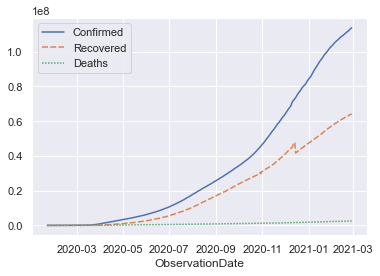

In [215]:
fig = sns.lineplot(data=groupdate)

From the graph above, we could see that the number of recovered cases is more than the number of death cases overtime. We will be taking a closer look at these graphs one by one in the next sections.

<h4>Total number of Confirmed Cases Around the World</h4>

Total number of Confirmed cases around the world: 113784735.0


Text(0.5, 1.0, 'Confirmed Cases Around the World')

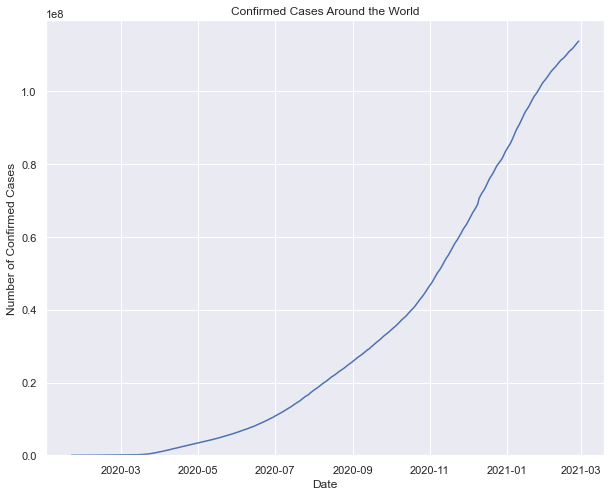

In [292]:
# get total number of confirmed cases
print('Total number of Confirmed cases around the world: %s' % groupdate["Confirmed"].iloc[-1])

#graph the data
fig = sns.lineplot(data=groupdate["Confirmed"], x=groupdate.index, y=groupdate["Confirmed"])
sns.set(rc={'figure.figsize':(10,8)})
fig.set_ylabel("Number of Confirmed Cases")
fig.set_xlabel("Date")
fig.set_ylim(ymin=0)
fig.set_title("Confirmed Cases Around the World")

As we can see on the graph, the rate of change (slope) of the graph is still high despite the virus being around for a year already. This could mean that there are still lots of countries that cannot control the spread of the virus.

<h4>Total number of Active Cases Around the World</h4>

Total number of Active cases around the world: 47016049.0


Text(0.5, 1.0, 'Active Cases Around the World')

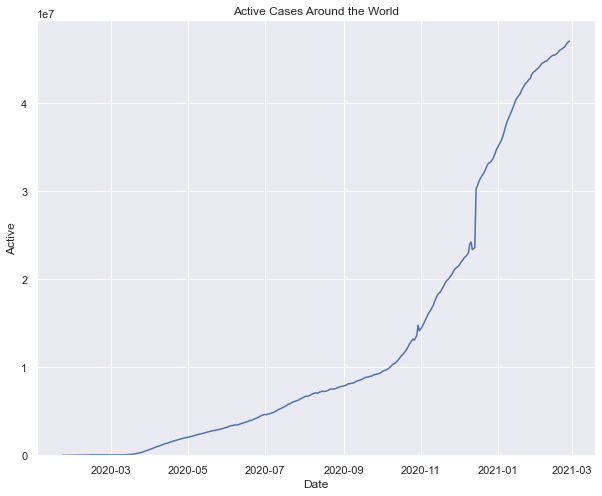

In [217]:
# get total number of active cases
groupdate["Active"] = groupdate["Confirmed"]-groupdate["Recovered"]-groupdate["Deaths"]
print('Total number of Active cases around the world: %s' % groupdate["Active"].iloc[-1])

#graph the data
fig = sns.lineplot(data=groupdate["Active"], x=groupdate.index, y=groupdate["Active"])
sns.set(rc={'figure.figsize':(10,8)})
fig.set_ylabel("Active")
fig.set_xlabel("Date")
fig.set_ylim(ymin=0)
fig.set_title("Active Cases Around the World")

From the graph above, we could see that the highest rate of change was from November 2020 to January 2021. One of the factors that could have affected the rate of change is the holiday season.

<h4>Total number of Recovered Cases Around the World</h4>

Total number of Recovered cases around the world: 64243285.0


Text(0.5, 1.0, 'Recovered Cases Around the World')

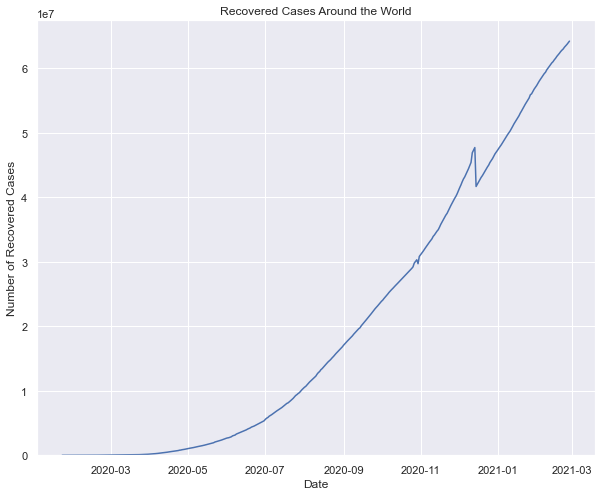

In [293]:
# get total number of recovered cases
print('Total number of Recovered cases around the world: %s' % groupdate["Recovered"].iloc[-1])

#graph the data
fig = sns.lineplot(data=groupdate["Recovered"], x=groupdate.index, y=groupdate["Recovered"])
sns.set(rc={'figure.figsize':(10,8)})
fig.set_ylabel("Number of Recovered Cases")
fig.set_xlabel("Date")
fig.set_ylim(ymin=0)
fig.set_title("Recovered Cases Around the World")

The number of recovered cases has been steadily increasing except between December 2020 and January 2021, wherein the rate of changed dropped for a while.

<h4>Total number of Deaths Around the World</h4>

Total number of Death cases around the world: 2525401.0


Text(0.5, 1.0, 'Deaths Around the World')

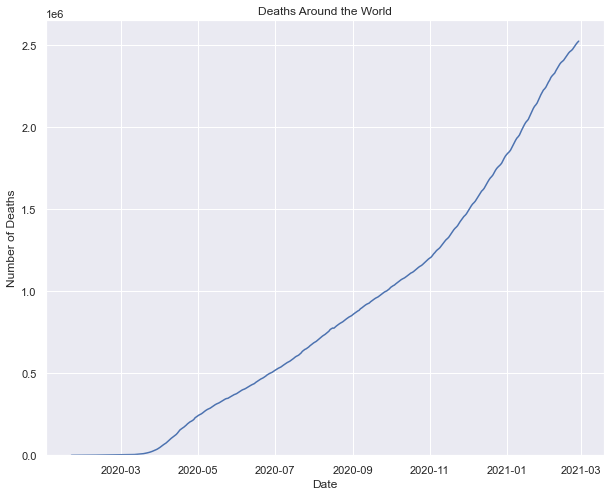

In [294]:
# get total number of deaths
print('Total number of Death cases around the world: %s' % groupdate["Deaths"].iloc[-1])

#graph the data
fig = sns.lineplot(data=groupdate["Deaths"], x=groupdate.index, y=groupdate["Deaths"])
sns.set(rc={'figure.figsize':(10,8)})
fig.set_ylabel("Number of Deaths")
fig.set_xlabel("Date")
fig.set_ylim(ymin=0)
fig.set_title("Deaths Around the World")

The number of deaths around the world due to the virus is steadily increasing.

<h2>Data Visualization</h2>

<h3>Total Number of Cases for Each Country </h3>

In [287]:
# group data per country
country= data.groupby(['Country/Region','ObservationDate']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

#compute for the death percent in each country
country["DeathPercent"]=country["Deaths"]/country["Confirmed"]*100

# sum of cases per country
sum_country= country.groupby(['Country/Region']).tail(1)
sum_country= sum_country.reset_index()
sum_country

,Country/Region,ObservationDate,Confirmed,Recovered,Deaths,DeathPercent
0,Azerbaijan,2020-02-28 00:00:00+00:00,1.0,0.0,0.0,0.000000
1,Afghanistan,2021-02-27 00:00:00+00:00,55707.0,49288.0,2443.0,4.385445
2,Albani,2021-02-27 00:00:00+00:00,106215.0,68969.0,1775.0,1.671139
3,Algeri,2021-02-27 00:00:00+00:00,112960.0,77976.0,2979.0,2.637217
4,Andorr,2021-02-27 00:00:00+00:00,10849.0,10429.0,110.0,1.013918
...,...,...,...,...,...,...
222,West Bank and Gaz,2021-02-27 00:00:00+00:00,181909.0,166119.0,2025.0,1.113194
223,Yemen,2021-02-27 00:00:00+00:00,2269.0,1435.0,631.0,27.809608
224,Zambi,2021-02-27 00:00:00+00:00,78202.0,73609.0,1081.0,1.382318
225,Zimbabwe,2021-02-27 00:00:00+00:00,36058.0,32590.0,1463.0,4.057352


Now that we have the total number of cases per country, we can now get the countries with the most number of cases.

In [280]:
#sort the number of cases in descending order
sum_country=sum_country.sort_values(by=['Confirmed'],ascending=False)

#get the top 15 countries
top15 = sum_country.head(15)
top15

,Country/Region,ObservationDate,Confirmed,Recovered,Deaths,DeathPercent
212,US,2021-02-27 00:00:00+00:00,28554465.0,0.0,511994.0,1.793044
94,Indi,2021-02-27 00:00:00+00:00,11096731.0,10775169.0,157051.0,1.415291
26,Brazil,2021-02-27 00:00:00+00:00,10517232.0,9371448.0,254221.0,2.417185
169,Russi,2021-02-27 00:00:00+00:00,4187166.0,3756808.0,84330.0,2.014011
211,UK,2021-02-27 00:00:00+00:00,4182772.0,11602.0,122939.0,2.939175
69,France,2021-02-27 00:00:00+00:00,3747263.0,261649.0,85741.0,2.288097
191,Spain,2021-02-27 00:00:00+00:00,3188553.0,150376.0,69142.0,2.168444
100,Italy,2021-02-27 00:00:00+00:00,2907825.0,2398352.0,97507.0,3.353262
210,Turkey,2021-02-27 00:00:00+00:00,2693164.0,2565723.0,28503.0,1.058346
75,Germany,2021-02-27 00:00:00+00:00,2444177.0,2252970.0,70092.0,2.867714


In [300]:
# fig,ax = plt.subplots()
# ax.pie(top15['Confirmed'], labels=top15['Country/Region'], autopct='%1.1f%%',
#         shadow=True, startangle=90)
# plt.show()

Text(0.5, 0, 'Number of Confirmed Cases')

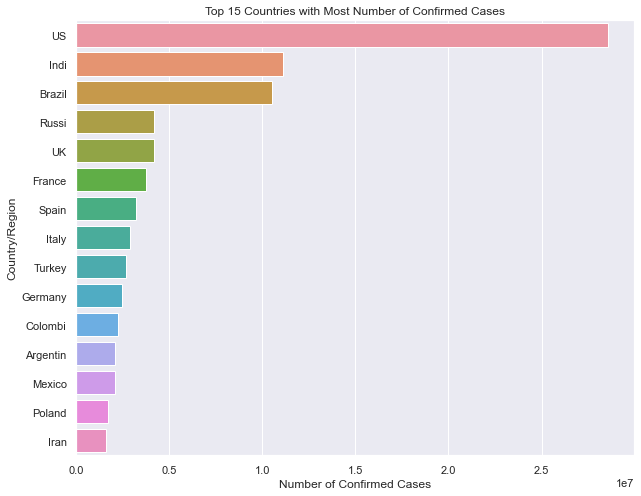

In [304]:
bar = sns.barplot(data=top15, x="Confirmed", y="Country/Region")
bar.set_title("Top 15 Countries with Most Number of Confirmed Cases")
bar.set_xlabel("Number of Confirmed Cases")

From the graph above, we can see that majority of the confirmed cases are from the United States of America. Majority of this list also belong to countries with large population.

<h4>Death Rate for Each Country</h4>

In [289]:
#sort the death rate in descending order
death_country=sum_country.sort_values(by=['DeathPercent'],ascending=False)

#get the top 15 countries
top15_death = death_country.head(15)
top15_death

,Country/Region,ObservationDate,Confirmed,Recovered,Deaths,DeathPercent
223,Yemen,2021-02-27 00:00:00+00:00,2269.0,1435.0,631.0,27.809608
120,MS Zaandam,2021-02-27 00:00:00+00:00,9.0,7.0,2.0,22.222222
134,Mexico,2021-02-27 00:00:00+00:00,2084128.0,1630002.0,185257.0,8.888945
199,Syri,2021-02-27 00:00:00+00:00,15533.0,9717.0,1023.0,6.585978
195,Sudan,2021-02-27 00:00:00+00:00,30316.0,22887.0,1880.0,6.201346
59,Egypt,2021-02-27 00:00:00+00:00,181829.0,140460.0,10639.0,5.851102
58,Ecuador,2021-02-27 00:00:00+00:00,284347.0,238817.0,15779.0,5.549206
123,Mainland Chin,2021-02-27 00:00:00+00:00,89893.0,85039.0,4636.0,5.157242
23,Bolivi,2021-02-27 00:00:00+00:00,248547.0,192553.0,11628.0,4.678391
1,Afghanistan,2021-02-27 00:00:00+00:00,55707.0,49288.0,2443.0,4.385445


In [308]:
# fig1,ax1 = plt.subplots()
# ax1.pie(top15_death['DeathPercent'], labels=top15_death['Country/Region'], autopct='%1.1f%%',
#         shadow=True, startangle=90)
# plt.show()

Text(0.5, 0, 'Death Percentage (in %)')

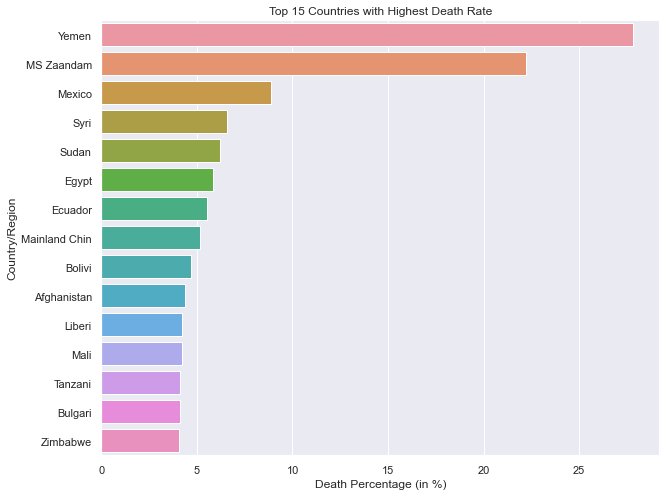

In [307]:
bar1 = sns.barplot(data=top15_death, x="DeathPercent", y="Country/Region")
bar1.set_title("Top 15 Countries with Highest Death Rate")
bar1.set_xlabel("Death Percentage (in %)")

From here, we could see that none of the top 15 deaths due to the virus belongs to the top 15 countries with the most number of confirmed cases. We could also recognize that majority of this list/chart are third world countries. Belonging to this classification may have an effect with how each country effectively responds to global emergencies.